<a href="https://colab.research.google.com/github/kavyapingale022-source/Disease-Pred/blob/main/Disease_Predictor_Using_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 01


In [46]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"kavyapingale","key":"2eff44bc91a33a8764a1fde54e1587c5"}'}

In [47]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [48]:
!pip install kaggle

In [49]:
!kaggle datasets download -d redwankarimsony/heart-disease-data -p /content/heart-disease --unzip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 42.0MB/s]


In [50]:
import pandas as pd
df = pd.read_csv('/content/heart-disease/heart_disease_uci.csv')

In [51]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [52]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [53]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [54]:
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

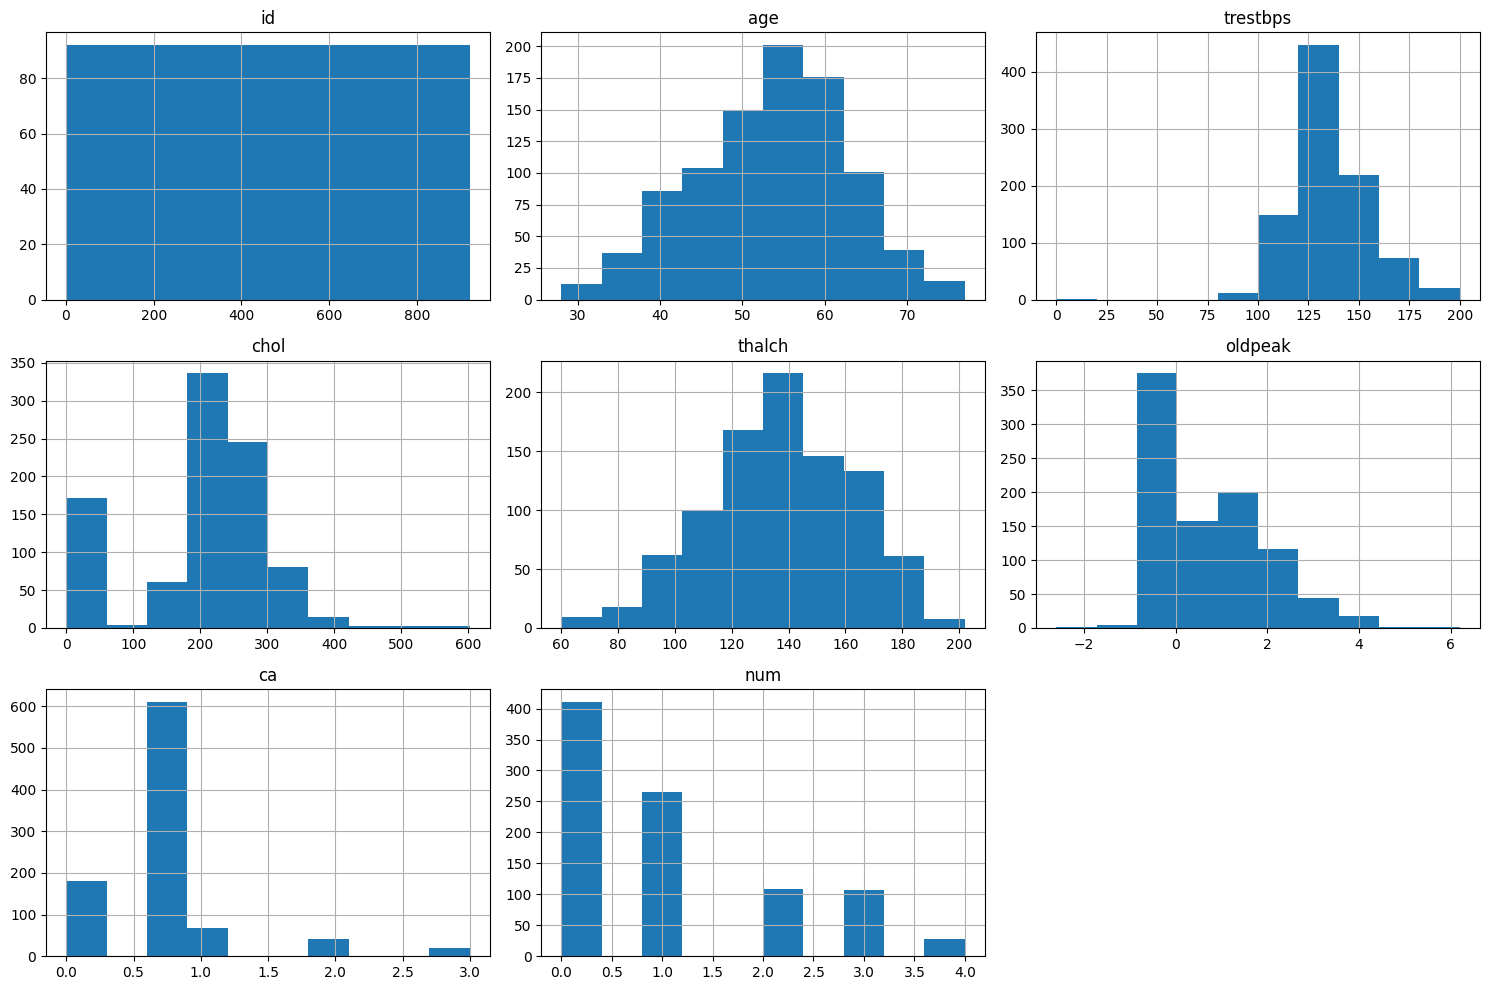

In [56]:
df[numeric_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

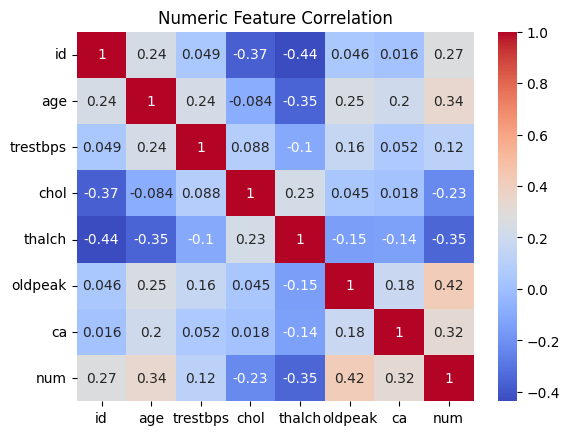

In [57]:
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Numeric Feature Correlation')
plt.show()

# Day 02


In [58]:
cat_cols = df.select_dtypes(include='object').columns.tolist() #one-hot encode All 'object' categotrical columns
if 'num' in cat_cols:
    cat_cols.remove('num') #Don't encode target column

In [59]:
x = df.drop('num' , axis=1)
y = (df['num'] > 0).astype(int) #0: no disease , 1: disease present

In [60]:
x = pd.get_dummies(x, columns=cat_cols)
print("Final feature columns:", x.columns)

Final feature columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


# Day 03

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

new value = (x-mean)/standard deviation


In [63]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [64]:
from sklearn.linear_model import LogisticRegression #its about classification

In [65]:
lr_model = LogisticRegression() #Giving admission to a new student
lr_model.fit(x_train, y_train) #Training step

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evolution


In [66]:
from sklearn.metrics import accuracy_score, classification_report

In [67]:
y_pred_lr = lr_model.predict(x_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7336956521739131
              precision    recall  f1-score   support

           0       0.63      0.84      0.72        75
           1       0.86      0.66      0.75       109

    accuracy                           0.73       184
   macro avg       0.74      0.75      0.73       184
weighted avg       0.76      0.73      0.74       184



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Accuracy score- 75 to 98 considered to be good

# Day 04


In [68]:
from sklearn.metrics import confusion_matrix

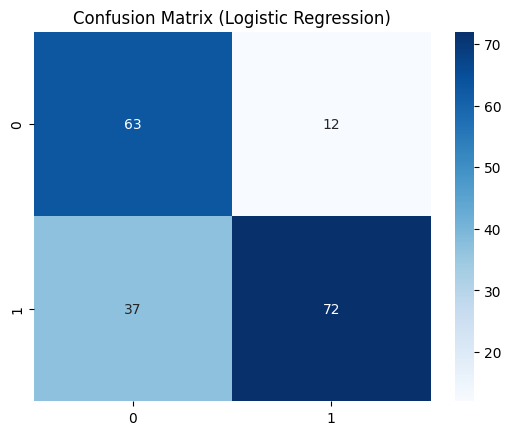

In [69]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_scaled, y_train)
y_pred_rf = rf_model.predict(x_test_scaled)

In [72]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8858695652173914


Feature Importance

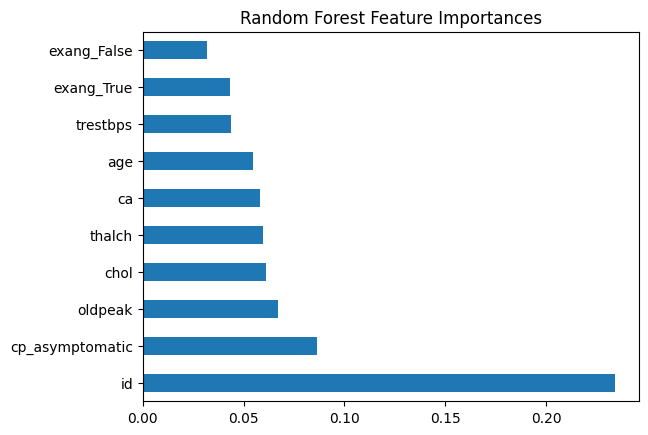

In [73]:
feat_imp = pd.Series(rf_model.feature_importances_, index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Random Forest Feature Importances')
plt.show()

Save The Model

In [74]:
import joblib
joblib.dump(rf_model, 'heart_rf_model.pkl')

['heart_rf_model.pkl']

In [75]:
joblib.dump(scaler, 'heart_scaler.pkl')

['heart_scaler.pkl']

In [76]:
sample = x.head()
sample.to_csv('Heart_User_Template.csv', index=False)
print("User Template Saved as 'Heart_User_Template.csv' ")

User Template Saved as 'Heart_User_Template.csv' 


# Day 05

In [77]:
from google.colab import files
files.upload()

Saving heart_dataset.csv to heart_dataset (1).csv


{'heart_dataset (1).csv': b'age,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina\n58,130,220,1,normal,150,False,1.4,flat,0,fixed defect,0,1,0,0,0,1\n67,160,276,0,lv hypertrophy,108,True,1.5,flat,3,normal,0,1,1,0,0,0\n42,120,230,0,normal,170,False,1.0,upsloping,0,reversable defect,1,0,0,0,1,0\n50,130,210,0,lv hypertrophy,158,False,0.8,flat,0,normal,0,1,0,0,1,0\n45,114,230,0,normal,165,False,1.1,downsloping,0,normal,1,0,0,1,0,0\n'}

In [78]:
import joblib
import pandas as pd

user_data = pd.read_csv('heart_dataset.csv')

#Getting column list from traning dataframe
numeric_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()
bool_cols = df.select_dtypes(include='bool').columns.tolist()

#Dropping columns which are extra in user_df than required to avoid error
numeric_cols = [col for col in numeric_cols if col in user_data.columns]
cat_cols = [col for col in cat_cols if col in user_data.columns]
bool_cols = [col for col in bool_cols if col in user_data.columns]


#fill the missing numeric column & cat column
user_data[numeric_cols]=user_data[numeric_cols].fillna(user_data[numeric_cols].mean())

for col in cat_cols:
    user_data[col]=user_data[col].fillna('Unknown')

for col in bool_cols:
    user_data[col]=user_data[col].astype(int)

#One-hot encoding cat columns
user_df_encoded=pd.get_dummies(user_data, columns=cat_cols)

#Allign column
user_df_encoded = user_df_encoded.reindex(columns=x.columns, fill_value=0)

#Scale data
scaler = joblib.load('heart_scaler.pkl')
user_df_scaled = scaler.transform(user_df_encoded)

#Prediction
model=joblib.load('heart_rf_model.pkl')
prediction=model.predict(user_df_scaled)
preds=model.predict(user_df_scaled)
user_data['Heart_Disease_Prediction']=preds

#show result
print(user_data)

   age  trestbps  chol  fbs         restecg  thalch  exang  oldpeak  \
0   58       130   220    1          normal     150  False      1.4   
1   67       160   276    0  lv hypertrophy     108   True      1.5   
2   42       120   230    0          normal     170  False      1.0   
3   50       130   210    0  lv hypertrophy     158  False      0.8   
4   45       114   230    0          normal     165  False      1.1   

         slope  ca               thal  sex_Female  sex_Male  cp_asymptomatic  \
0         flat   0       fixed defect           0         1                0   
1         flat   3             normal           0         1                1   
2    upsloping   0  reversable defect           1         0                0   
3         flat   0             normal           0         1                0   
4  downsloping   0             normal           1         0                0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  \
0                   0           